In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score



In [4]:
df = pd.read_csv('./LondonCars2014.csv')

In [5]:
### 1. DATA OBSERVATION AND CLEANING

In [6]:
df.head(10)

,Make,Model,Year,Mileage,Price,Body Style,Ex Color,In Color,Engine,Transmission,Doors
0,Toyota,Avalon XLE,2014,4725,28995,Sedan,Gray,Black,6 Cyl,Automatic,4
1,Ford,Escape SE,2014,17201,24994,SUV,Silver,Black,4 Cyl,Automatic,4
2,Hyundai,Santa Fe Sport,2014,6279,25998,SUV,Silver,Gray,4 Cyl,Automatic,4
3,Ford,Escape SE,2014,16262,26684,SUV,Black,Black,4 Cyl,Automatic,4
4,Jeep,Grand Cherokee Limited Edition,2014,35572,33440,SUV,Black,Black,6 Cyl,Automatic,4
5,Honda,CR-V EXL,2014,10078,29995,SUV,Black,Black,4 Cyl,Automatic,4
6,Hyundai,Elantra GLS,2013,12649,16991,Sedan,Silver,Gray,4 Cyl,Automatic,4
7,GMC,Acadia SLT,2014,15814,34497,SUV,Silver,Black,6 Cyl,Automatic,4
8,GMC,Acadia SLT,2014,17974,34997,SUV,White,Black,6 Cyl,Automatic,4
9,Nissan,Armada SV,2014,20992,34999,SUV,Black,Gray,8 Cyl,Automatic,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          9080 non-null   object
 1   Model         9080 non-null   object
 2   Year          9080 non-null   int64 
 3   Mileage       9080 non-null   int64 
 4   Price         9080 non-null   int64 
 5   Body Style    9080 non-null   object
 6   Ex Color      9080 non-null   object
 7   In Color      9080 non-null   object
 8   Engine        9080 non-null   object
 9   Transmission  9080 non-null   object
 10  Doors         9080 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 780.4+ KB


In [8]:
# From the above we can see that there are no null values
# You should notice that the data-types are not exactly correct. For instance, the type for the Doors attribute (column) is infered as numeric (64-bit integer), however it should be a categorical column

In [9]:
df = df.astype({'Make':'category', 'Model':'category', 'Year':'category', 
                'Mileage':'int32', 'Price':'int64', 'Body Style':'category', 
                'Ex Color':'category' , 'In Color':'category', 
                'Engine':'category', 'Transmission':'category', 'Doors':'category'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Make          9080 non-null   category
 1   Model         9080 non-null   category
 2   Year          9080 non-null   category
 3   Mileage       9080 non-null   int32   
 4   Price         9080 non-null   int64   
 5   Body Style    9080 non-null   category
 6   Ex Color      9080 non-null   category
 7   In Color      9080 non-null   category
 8   Engine        9080 non-null   category
 9   Transmission  9080 non-null   category
 10  Doors         9080 non-null   category
dtypes: category(9), int32(1), int64(1)
memory usage: 248.0 KB


In [10]:
### 2. BASIC EXPLORATORY ANALYSIS

In [11]:
print(df.shape)

(9080, 11)


In [12]:
# from the above, we can interpret that there are 11 attributes (columns)
print('Column names:')
print(df.columns)

Column names:
Index(['Make', 'Model', 'Year', 'Mileage', 'Price', 'Body Style', 'Ex Color',
       'In Color', 'Engine', 'Transmission', 'Doors'],
      dtype='object')


In [13]:
# checking unique values of each columns
for col in df.columns:
    print(col)
    print(df[col].unique())



Make
['Toyota', 'Ford', 'Hyundai', 'Jeep', 'Honda', ..., 'Maserati', 'Tesla', 'Plymouth', 'Oldsmobile', 'Fiat']
Length: 49
Categories (49, object): ['Toyota', 'Ford', 'Hyundai', 'Jeep', ..., 'Tesla', 'Plymouth', 'Oldsmobile', 'Fiat']
Model
['Avalon XLE', 'Escape SE', 'Santa Fe Sport', 'Grand Cherokee Limited Edition', 'CR-V EXL', ..., 'Armada Titanium Edition', 'Torrent', '900 S', 'Rio', 'S80 Platinum']
Length: 1060
Categories (1060, object): ['Avalon XLE', 'Escape SE', 'Santa Fe Sport', 'Grand Cherokee Limited Edition', ..., 'Torrent', '900 S', 'Rio', 'S80 Platinum']
Year
[2014, 2013, 2012, 2011, 2010, ..., 1995, 2015, 1996, 1994, 1990]
Length: 24
Categories (24, int64): [2014, 2013, 2012, 2011, ..., 2015, 1996, 1994, 1990]
Mileage
[ 4725 17201  6279 ...  6761 38215 44065]
Price
[28995 24994 25998 ... 48825 25677 14944]
Body Style
['Sedan', 'SUV', 'Hatchback', 'Wagon', 'Coupe', 'Minivan', 'Van', 'Pickup', 'Convertible', 'Chassis']
Categories (10, object): ['Sedan', 'SUV', 'Hatchback',

In [14]:
# Maximum and minimum price
print('min = {}'.format(df['Price'].min()))
print('max = {}'.format(df['Price'].mode()))
print('mean = {}'.format(df['Price'].mean()))
print('median = {}'.format(df['Price'].median()))

min = 1490
max = 0    19995
dtype: int64
mean = 24410.92665198238
median = 21500.0


In [15]:
# Most common car model
print('max = {}'.format(df['Model'].mode()))

max = 0    Altima S
Name: Model, dtype: category
Categories (1060, object): ['1 Series 128i', '1500 Laramie', '1500 SLT', '1500 ST', ..., 'tC Sport', 'xB', 'xD', 'xD Base']


In [16]:
# For Honda:
print('Average price of a Honda car = {:.2f}'.format(df.loc[df['Make'] == 'Honda']['Price'].mean()))
# Now you do for Mercedes-Benz:
print('Average price of a Mercedes-Benz car = {:.2f}'.format(df.loc[df['Make'] == 'Mercedes-Benz']['Price'].mean()))

Average price of a Honda car = 18337.49
Average price of a Mercedes-Benz car = 37620.97


In [22]:
# Make sorted by Price
df[['Make', 'Price']].sort_values('Price')

,Make,Price
7441,Mitsubishi,1490
2868,Ford,1500
3239,Jaguar,1800
4990,Hyundai,1900
8032,Plymouth,1995
...,...,...
5263,Rolls-Royce,232900
4119,Rolls-Royce,239995
2767,Maybach,319995
1213,Lamborghini,359980


In [23]:
### 3. DATA VISUALISATION

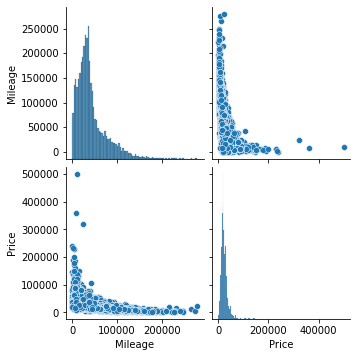

In [24]:
from plotly.offline import iplot, init_notebook_mode
import seaborn as sns
import matplotlib.pyplot as plt


init_notebook_mode(connected=True)

sns.pairplot(df)
plt.show()

In [25]:
### 3.1. LABEL ENCODING CATEGORICAL COLUMNS

from sklearn.preprocessing import LabelEncoder
from IPython.display import display, HTML

df_copy = df.copy()
for col in df_copy.columns:
    if (df_copy[col].dtype != 'int32') & (df_copy[col].dtype != 'int64'):
        col_indx_arry = df_copy.columns.get_indexer([col])
        col_indx = int(col_indx_arry[0])
        col_name = col + '_num'
        labelencoder = LabelEncoder()
        values = labelencoder.fit_transform(df_copy[col])
        df_copy.insert(loc=col_indx, column=col_name, value=values)
        
print('\n Dataframe with label encoded columns: \n')
display(HTML(df_copy.head(15).to_html()))     


 Dataframe with label encoded columns: 



,Make_num,Make,Model_num,Model,Year_num,Year,Mileage,Price,Body Style_num,Body Style,Ex Color_num,Ex Color,In Color_num,In Color,Engine_num,Engine,Transmission_num,Transmission,Doors_num,Doors
0,46,Toyota,134,Avalon XLE,22,2014,4725,28995,7,Sedan,6,Gray,0,Black,5,6 Cyl,0,Automatic,2,4
1,12,Ford,353,Escape SE,22,2014,17201,24994,6,SUV,12,Silver,0,Black,3,4 Cyl,0,Automatic,2,4
2,16,Hyundai,840,Santa Fe Sport,22,2014,6279,25998,6,SUV,12,Silver,3,Gray,3,4 Cyl,0,Automatic,2,4
3,12,Ford,353,Escape SE,22,2014,16262,26684,6,SUV,1,Black,0,Black,3,4 Cyl,0,Automatic,2,4
4,19,Jeep,485,Grand Cherokee Limited Edition,22,2014,35572,33440,6,SUV,1,Black,0,Black,5,6 Cyl,0,Automatic,2,4
5,14,Honda,179,CR-V EXL,22,2014,10078,29995,6,SUV,1,Black,0,Black,3,4 Cyl,0,Automatic,2,4
6,16,Hyundai,328,Elantra GLS,21,2013,12649,16991,7,Sedan,12,Silver,3,Gray,3,4 Cyl,0,Automatic,2,4
7,13,GMC,97,Acadia SLT,22,2014,15814,34497,6,SUV,12,Silver,0,Black,5,6 Cyl,0,Automatic,2,4
8,13,GMC,97,Acadia SLT,22,2014,17974,34997,6,SUV,13,White,0,Black,5,6 Cyl,0,Automatic,2,4
9,32,Nissan,124,Armada SV,22,2014,20992,34999,6,SUV,1,Black,3,Gray,6,8 Cyl,0,Automatic,2,4


In [26]:
# df_copy.info()

In [27]:
# Keeping numberical columns only
df_num = df_copy.select_dtypes(exclude=["category"])
print('Dataframe with numerical columns only (including label encoded columns)\n')
display(HTML(df_num.head(10).to_html()))

Dataframe with numerical columns only (including label encoded columns)



,Make_num,Model_num,Year_num,Mileage,Price,Body Style_num,Ex Color_num,In Color_num,Engine_num,Transmission_num,Doors_num
0,46,134,22,4725,28995,7,6,0,5,0,2
1,12,353,22,17201,24994,6,12,0,3,0,2
2,16,840,22,6279,25998,6,12,3,3,0,2
3,12,353,22,16262,26684,6,1,0,3,0,2
4,19,485,22,35572,33440,6,1,0,5,0,2
5,14,179,22,10078,29995,6,1,0,3,0,2
6,16,328,21,12649,16991,7,12,3,3,0,2
7,13,97,22,15814,34497,6,12,0,5,0,2
8,13,97,22,17974,34997,6,13,0,5,0,2
9,32,124,22,20992,34999,6,1,3,6,0,2


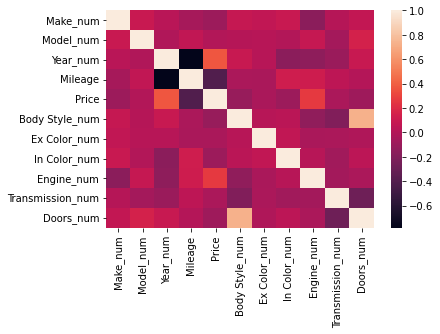

In [28]:
# coorelation matrix
import seaborn as sn
import matplotlib.pyplot as plt

df_corr = df_num.corr()
sn.heatmap(df_corr, annot=False)
plt.show()

In [29]:
# From the above, we can infer that there is a relatively higher coorelation between price and Engine as well as price and year

<AxesSubplot:xlabel='Engine_num', ylabel='Price'>

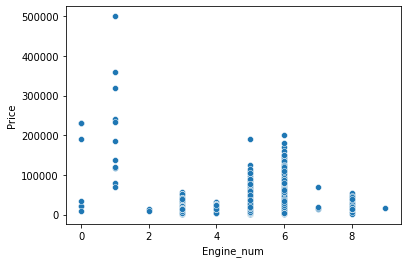

In [30]:
sns.scatterplot(x='Engine_num',
                y='Price', data=df_num)

<AxesSubplot:xlabel='Year_num', ylabel='Price'>

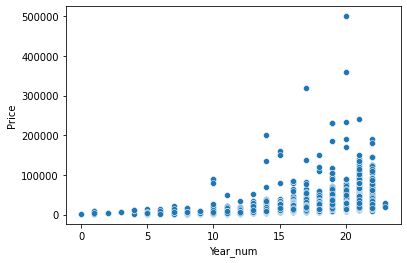

In [31]:
sns.scatterplot(x='Year_num',
                y='Price', data=df_num)

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

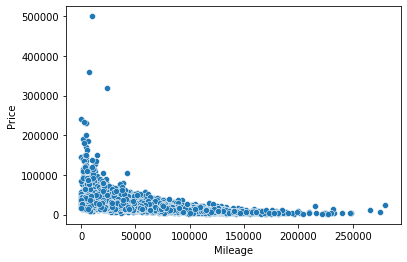

In [32]:
sns.scatterplot(x='Mileage',
                y='Price', data=df_num)

In [33]:
### 4. PREPARING DATA FOR MODELLING
X = df_num.drop(columns=['Price'])
y = df_num['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6356, 10) (2724, 10) (6356,) (2724,)


In [34]:
### 5. MULTIPLE LINEAR REGRESSION

# creating a regression model
model = LinearRegression()
  
# fitting the model
model.fit(X_train, y_train)
  
# making predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
  

# model evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('mean_squared_error (with X_train): ', mse_train)
print('mean_squared_error (with X_test): ', mse_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('mean_absolute_error (with X_train) : ', mae_train)
print('mean_absolute_error(with X_test): ', mae_test)

mean_squared_error (with X_train):  172419093.44982356
mean_squared_error (with X_test):  225475418.86972865
mean_absolute_error (with X_train) :  6539.02009693728
mean_absolute_error(with X_test):  6659.099366675247


In [35]:
r2_train = r2_score(y_train, y_pred_train)
print('R-squared (with X_train): {}'.format(r2_train))

r2_test = r2_score(y_test, y_pred_test)
print('R-squared (with X_test): {}'.format(r2_test))

# Based on the results, we can see that the r2 score is very low, hence the accuracy is pretty low. 
# The MSE for training data is lower than the MSE for test data, indicating overfitting

R-squared (with X_train): 0.31324423067914975
R-squared (with X_test): 0.24772008867114603


In [36]:
print(model.intercept_)
print(model.coef_)

-1976.4070890033654
[-5.82183937e+01  6.56308447e-02  1.15049551e+03 -1.44190231e-01
 -6.18503928e+02 -8.52775596e+01 -1.07275547e+02  4.34131467e+03
  9.76053713e+02 -1.24164344e+03]


In [38]:
from decimal import *
degree = [1]

train_MSE = ['%.2E' % Decimal(mse_train)]
test_MSE = ['%.2E' % Decimal(mse_test)]

train_r_sq = ['%.2E' % Decimal(r2_train)]
test_r_sq = ['%.2E' % Decimal(r2_test)]

In [39]:
# TODO - improve accuracy using standardization or normalization
# apply k fold cross validation for analysis

In [40]:
### 5. POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures

degrees = [2,3,4,5]

for i in range(len(degrees)):
    d = degrees[i]
    poly = PolynomialFeatures(degree= d, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train, y_train)
    
    poly_reg_y_predicted_train = poly_reg_model.predict(X_train)
    poly_reg_rmse_train = np.sqrt(mean_squared_error(y_train, poly_reg_y_predicted_train))
    train_MSE.append('%.2E' % Decimal(poly_reg_rmse_train))
    
    poly_reg_y_predicted_test = poly_reg_model.predict(X_test)
    poly_reg_rmse_test = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted_test))
    test_MSE.append('%.2E' % Decimal(poly_reg_rmse_test))
    
    r2_train = r2_score(y_train, poly_reg_y_predicted_train)
    train_r_sq.append('%.2E' % Decimal(r2_train))
    
    r2_test = r2_score(y_test, poly_reg_y_predicted_test)
    test_r_sq.append('%.2E' % Decimal(r2_test))
    
    degree.append(d)

print('degree: {}'.format(degree))
print('train_MSE: {}'.format(train_MSE))
print('test_MSE: {}'.format(test_MSE))
print('train_r_sq: {}'.format(train_r_sq))
print('test_r_sq: {}'.format(test_r_sq))
      

degree: [1, 2, 3, 4, 5]
train_MSE: ['1.72E+08', '1.34E+04', '1.20E+04', '1.31E+04', '1.89E+04']
test_MSE: ['2.25E+08', '1.19E+04', '1.31E+04', '2.02E+04', '6.43E+04']
train_r_sq: ['3.13E-01', '3.59E-01', '4.88E-01', '3.88E-01', '-2.73E-01']
test_r_sq: ['2.48E-01', '3.95E-01', '2.61E-01', '-7.44E-01', '-1.67E+01']


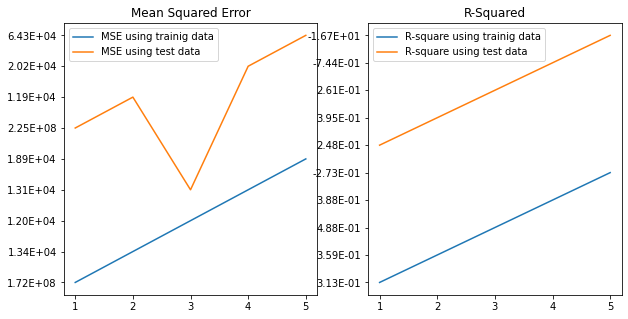

In [41]:
# plot lines
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.subplot(1, 2, 1)
plt.plot(degree, train_MSE, label = "MSE using trainig data")
plt.plot(degree, test_MSE, label = "MSE using test data")
plt.title("Mean Squared Error")
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(degree, train_r_sq, label = "R-square using trainig data")
plt.plot(degree, test_r_sq, label = "R-square using test data")
plt.title("R-Squared")
plt.legend(loc='best')

plt.show()


In [42]:
# From the above we can see that the model performs best on when polynomial degree is 3 however the accuracy is still pretty low